## Project Proposal: 


There is an urban myth that fastfood chain outlets are a phenomena of low to middle income population groups or localities. For example the notion that the outer perimeter of where Red Rooster stores are spread is said to demarcate Western Sydney from the 'rest' of Sydney, i.e. the lower socioeconomic status localities from the higher. 

This project seeks to examine this general proposition about fastfood chain outlets by looking at several datasets pertaining to Mcdonalds Family Restaurants across Australia, where they are located by postcode, by Local Government Authority, and by metrics of socioeconomic disadvantage/advantage. 

The interest in Mcdonalds stem from the anecdotal observation that 11 such outlets currently operate from the suburb of Liverpool 2170, a locality situated in the Western Sydney heartland and known for its working class background, its ethnic diversity (especially of recent humanitarian entrants), the challenges it faces around employment, and thereby the low socioeconomic status (SES) ascribed to it. Furthermore, there are 849 outlets Australia-wide and across 560 postcode localities, compared to the lower figure of 348 outlets for Red Rooster, which Mcdonalds therefore provide a better-sized dataset to work with.

Data relating to Mcdonalds outlets were obtained from the online Yellow Pages. And, the data relating to socioeconomic disadvantage/advantage were obtained from the 2016 ABS Census' Socioeconomic Indexes For Areas (SEIFA), in particular the Index for Relative SocioEconomic Advantage and Disadvantage (IRSAD) - which posits a percentile or decile score against the area under observation (in this project's case, Postcode area or Local Government Authority area) from a 'Most Disadvantaged' to 'Most Advantaged' status.


## Project Brief: 


A prexeisting datafile in excel contained information on the 559 Mcdonalds outlets across Australia indicating their location and numbers by postcode, and the corresponding Local Government Authority (LGA) it was located in, its corresponding IRSAD score by postcode, and corresponding population by postcode. Minimal 'cleaning' of the dataset was required. 

Preliminary exploration of this dataset looked at the number or frequency of Macdonald outlets in any given Locality, considering that it is not uncommon that multiple outlets operate in one postcode locality - the highest number in anyone postcode being in Liverpool 2170, as already mentioned above. The distribution of localities hosting Macdonald outlets by their IRSAD score was also part of the preliminary examination. Already, it appeared that the proposition that 'fastfood chain outlets are a phenomena of low to middle income population groups or localities' was not holding too firmly, where variability of outlets by locality or by socioeconomic measure was not clearly discernible. Indeed, the remarkable situation of Liverpool 2170 exhibiting 11 outlets showed to be an outlier, against the equally remarkable result of many high SES localities, i.e. in the top 9th and 10th percentiles, showing multiple Mcdonalds outlets operating there.

In the final analysis the correlation between the IRSAD score of a locality, at the LGA level (so as to aggregate postcode locations and numbers of Mcdonalds outlets) was undertaken, only showing a low postive correlation between the variables at the measure of 0.27. Thus, the urban myth that fastfood chain outlets, as far as Mcdonalds Family Restaurants go, are a phenomena of low to middle income population groups or localities, cannot be upheld on the basis of the SEIFA measure of IRSAD. 

- NB. Moreover, the strongest correlation, which at 0.53 was still a weak one, showed to be the relationship between the population of the locality and the number of outlets in that locality - which is arguably a factor of simple business imperative (of being situated in high population locations) more than anything else.



## Technical Notebook: 

The following Jupyter notebook documents the code and process undertaken to explore the above question and to arrive at the conclusion stated above.


In [480]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

In [481]:
import os
print(os.getcwd())

/Users/parto/Documents/GitHub/1-2-Intro-DS-master/projects/final


## Loading the dataset: 'McDonalds_AUS.csv'

**McD_Pc:** Postcodes wherein a Mcdonalds outlet is located.

**McD_Count:** the number of Mcdonalds outlets in the postcode locality.

**IRSAD_Pc_Decile:** the IRSAD score of the stated postcode, as deciles, per ABS Census 2016, SEIFA.

**IRSAD_Pc_Prcntl:** the IRSAD score of the stated postcode, as percentiles, per ABS Census 2016, SEIFA.

**Pop_Pc:** Population of the postcode locality, per ABS Census 2016.

**Peo_per_McD:** Ratio of Mcdonalds outlets in the postcode locality to the population there.

**1000_per_McD:** Ratio of Mcdonalds outlets in the postcode locality to the population there in the 1000s.

**McD-LGA:** The Local Government Authority area in which the Mcdonalds outlet is located.


In [482]:
McD_AU = pd.read_csv('./McDonalds_AUS.csv', sep = ',')
McD_AU

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD,McD_LGA
0,2170,11,4.0,34.0,105451.0,9586.0,9.6,Liverpool
1,2000,8,9.0,85.0,27411.0,3426.0,3.4,Sydney
2,4870,6,5.0,42.0,71009.0,11835.0,11.8,Tablelands
3,2250,6,6.0,58.0,67194.0,11199.0,11.2,Wyong
4,2148,6,5.0,45.0,63071.0,10512.0,10.5,Holroyd
5,4350,5,5.0,42.0,106745.0,21349.0,21.3,Toowoomba
6,3977,5,6.0,52.0,93326.0,18665.0,18.7,Greater Dandenong
7,4305,5,2.0,20.0,62549.0,12510.0,12.5,Ipswich
8,3199,5,6.0,51.0,54298.0,10860.0,10.9,Mornington Peninsula
9,2340,5,4.0,33.0,49072.0,9814.0,9.8,Upper Hunter Shire


In [483]:
# McD_AU.rename(columns={'McD_LGA':'LGA'}, inplace=True)

In [484]:
McD_AU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 8 columns):
McD_Pc             559 non-null int64
McD_Count          559 non-null int64
IRSAD_Pc_Decile    558 non-null float64
IRSAD_Pc_Prcntl    558 non-null float64
Pop_Pc             558 non-null float64
Peo_per_McD        558 non-null float64
1000_per_McD       558 non-null float64
McD_LGA            559 non-null object
dtypes: float64(5), int64(2), object(1)
memory usage: 35.0+ KB


## Detecting Null values in the dataset

In [485]:
McD_AU[McD_AU.IRSAD_Pc_Decile.isnull()]

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD,McD_LGA
175,5950,1,NaN,NaN,NaN,NaN,NaN,West Torrens


In [486]:
McD_AU.drop([175], axis = 0, inplace=True)

**Confirming Null records removed . . .**

In [487]:
McD_AU[McD_AU.IRSAD_Pc_Decile.isnull()]

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD,McD_LGA


In [488]:
McD_AU.shape

(558, 8)

## Changing the names of columns

That is for better ease and consistency of understanding what they represent, ahead of manipulating them.


In [489]:
McD_AU.rename(columns={'Pcode_Counted':'McD_Pc', 'Pcode_Count':'McD_Count', 
                       'Pop_PC':'Pop_Pc', 'IRSAD_dec_Pc':'IRSAD_Pc_Decile', 
                       'IRSAD_per_Pc':'IRSAD_Pc_Prcntl', 
                       'LGA':'McD_LGA'})
McD_AU.head()

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD,McD_LGA
0,2170,11,4.0,34.0,105451.0,9586.0,9.6,Liverpool
1,2000,8,9.0,85.0,27411.0,3426.0,3.4,Sydney
2,4870,6,5.0,42.0,71009.0,11835.0,11.8,Tablelands
3,2250,6,6.0,58.0,67194.0,11199.0,11.2,Wyong
4,2148,6,5.0,45.0,63071.0,10512.0,10.5,Holroyd


In [490]:
McD_AU.rename(columns={'McD_LGA':'LGA'}, inplace=True)
McD_AU.head()

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD,LGA
0,2170,11,4.0,34.0,105451.0,9586.0,9.6,Liverpool
1,2000,8,9.0,85.0,27411.0,3426.0,3.4,Sydney
2,4870,6,5.0,42.0,71009.0,11835.0,11.8,Tablelands
3,2250,6,6.0,58.0,67194.0,11199.0,11.2,Wyong
4,2148,6,5.0,45.0,63071.0,10512.0,10.5,Holroyd


## . . . and checking the general dataframe characteristics and datatypes

In [491]:
McD_AU.describe(include = 'all')

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD,LGA
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brisbane
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
mean,3677.120072,1.519713,5.767025,53.189964,24074.512545,17527.580645,17.527778,NaN
std,1385.445391,1.021566,3.007983,29.987067,16345.465276,10757.146691,10.759182,NaN
min,800.000000,1.000000,1.000000,1.000000,73.000000,37.000000,0.000000,NaN
25%,2531.500000,1.000000,3.000000,26.000000,12784.500000,10396.750000,10.400000,NaN
50%,3200.000000,1.000000,6.000000,55.000000,19771.500000,15262.000000,15.300000,NaN
75%,4557.750000,2.000000,9.000000,81.000000,31638.250000,22994.000000,23.025000,NaN


In [492]:
McD_AU.dtypes

McD_Pc               int64
McD_Count            int64
IRSAD_Pc_Decile    float64
IRSAD_Pc_Prcntl    float64
Pop_Pc             float64
Peo_per_McD        float64
1000_per_McD       float64
LGA                 object
dtype: object

## Examining the distribution of localities hosting Macdonald outlets by their IRSAD score


Text(0.5,1,'Distribution of Localities across AU hosting Macdonald outlets by their IRSAD score (ABS Census 2016, SEIFA)')

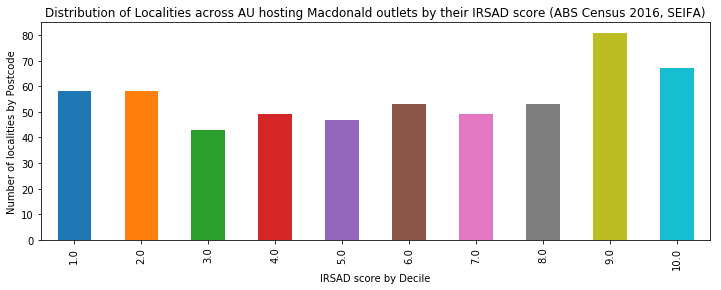

In [493]:
McD_AU.IRSAD_Pc_Decile.value_counts().sort_index().plot(kind='bar', figsize=(12,4));
plt.xlabel('IRSAD score by Decile');
plt.ylabel('Number of localities by Postcode')
plt.title('Distribution of Localities across AU hosting Macdonald outlets by their IRSAD score (ABS Census 2016, SEIFA)')

## Exploring the number of Mcdonald outlets in any given locality.

The majority, expectedly, of localities hosted only one Mcdonalds outlet, with roughly 10% hosting two or more. The noteable case of eleven outlets was in Liverpool 2170.

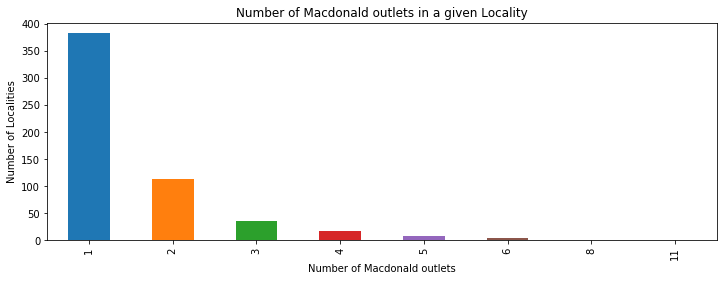

In [494]:
McD_AU.McD_Count.value_counts().sort_index().plot(kind='bar', figsize=(12,4));
plt.xlabel('Number of Macdonald outlets');
plt.ylabel('Number of Localities')
plt.title('Number of Macdonald outlets in a given Locality');

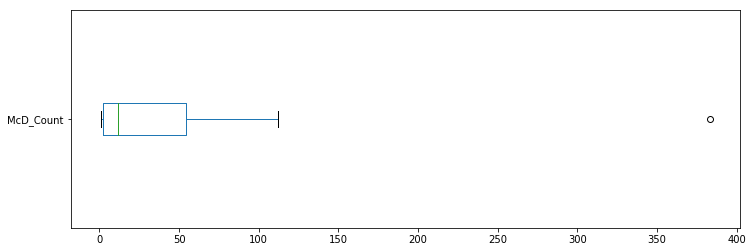

In [495]:
McD_AU.McD_Count.value_counts().sort_index().plot(kind='box', vert = False, figsize=(12,4));

In [496]:
# NSWcrime.groupby('IER_Decile').Assault_Dom.value_counts()
McD_AU.groupby('IRSAD_Pc_Decile').McD_Count.sum()

IRSAD_Pc_Decile
1.0      78
2.0      84
3.0      60
4.0      90
5.0      88
6.0      92
7.0      70
8.0      75
9.0     129
10.0     82
Name: McD_Count, dtype: int64

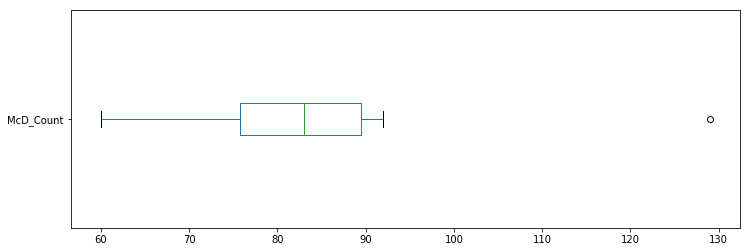

In [497]:
McD_AU.groupby('IRSAD_Pc_Decile').McD_Count.sum().plot(kind='box', vert = False, figsize=(12,4));

## Examining the frequency distribution of Mcdonald outlets by IRSAD scores.

Percentile depictions show too granular a pattern, compared to the Decile depiction. In the latter suggests a strong presence of Mcdonalds outlets in both lower and middle socioeconomic status localities, and interestingly a ver pronounced preence in the higher socioeconomic status localities.

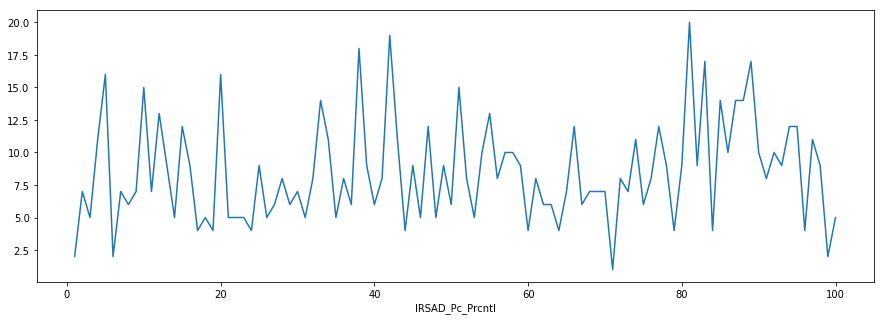

In [498]:
McD_AU.groupby('IRSAD_Pc_Prcntl').McD_Count.sum().plot(kind = 'line', figsize = (15, 5));

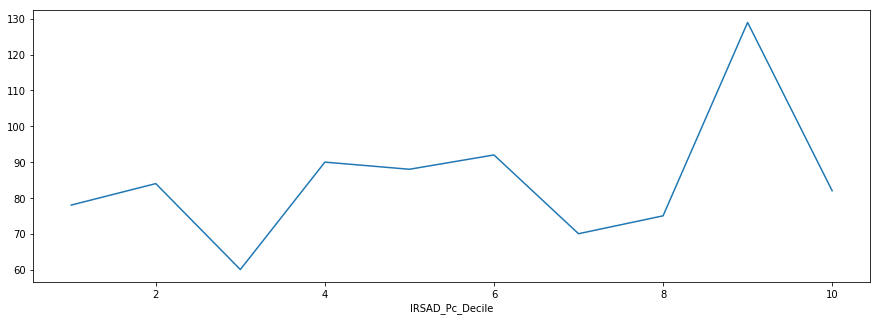

In [499]:
McD_AU.groupby('IRSAD_Pc_Decile').McD_Count.sum().plot(kind = 'line', figsize = (15, 5))

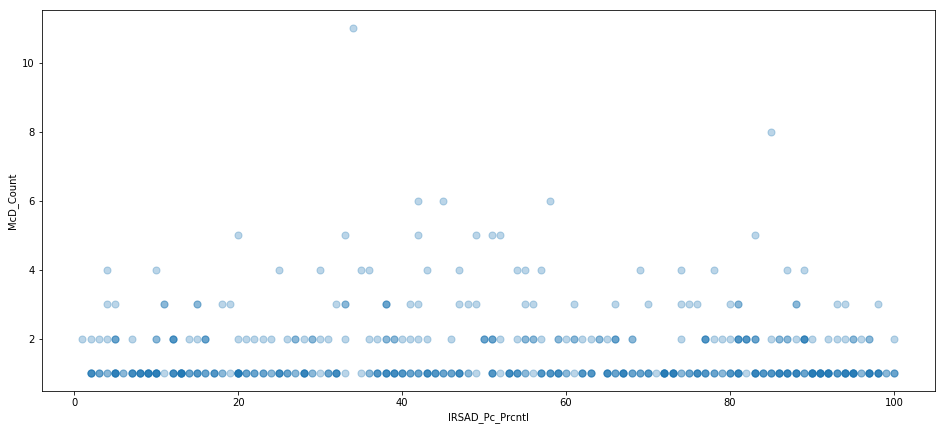

In [500]:
McD_AU.plot(kind = 'scatter', x = 'IRSAD_Pc_Prcntl', y = 'McD_Count', figsize=(16,7), s=50, alpha=.3);

## Examining the effect of adjusting for the 'population' to 'outlets' ratio in a postcode locality.

A scatterplot of Population-to-Outlets ratio versus the IRSAD scores displayed no discernible pattern of association.


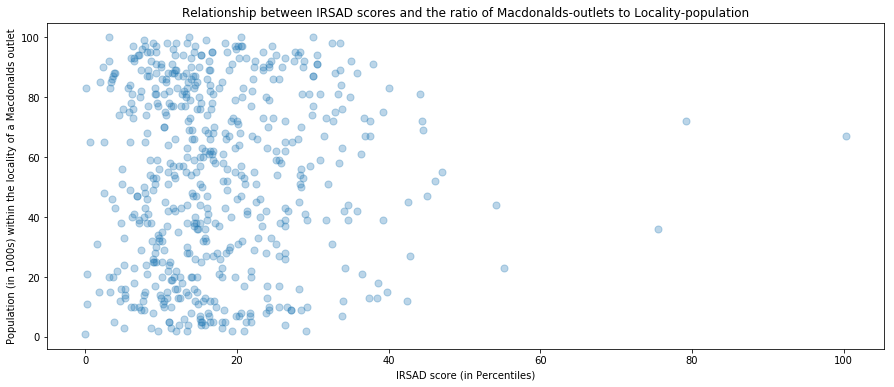

In [501]:
McD_AU.plot(kind = 'scatter', x = '1000_per_McD', y = 'IRSAD_Pc_Prcntl', 
            figsize = (15,6), alpha=0.3, s=50,
            title= 'Relationship between IRSAD scores and the ratio of Macdonalds-outlets to Locality-population')
plt.ylabel('Population (in 1000s) within the locality of a Macdonalds outlet')
plt.xlabel('IRSAD score (in Percentiles)');
# plt.savefig('IRSAD_scores_by_MaccasOutlet1.png'); 

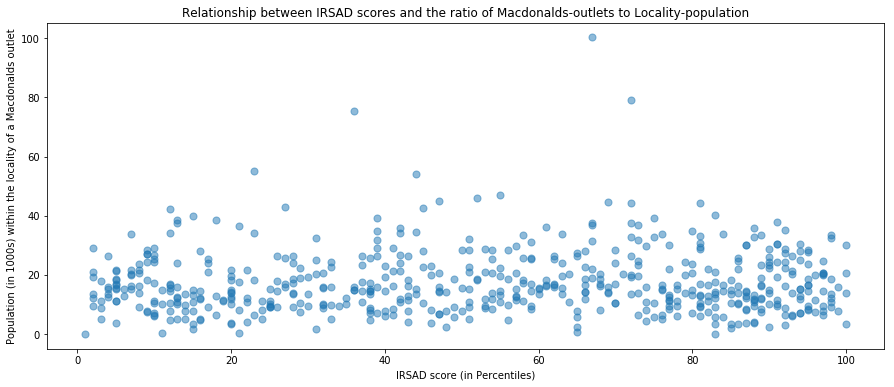

In [502]:
McD_AU.plot(kind = 'scatter', x = 'IRSAD_Pc_Prcntl', y = '1000_per_McD', 
            figsize =(15,6), alpha=0.5, s=50,
            title= 'Relationship between IRSAD scores and the ratio of Macdonalds-outlets to Locality-population');
plt.ylabel('Population (in 1000s) within the locality of a Macdonalds outlet')
plt.xlabel('IRSAD score (in Percentiles)');
# plt.savefig('IRSAD_scores_by_MaccasOutlet2.png'); 

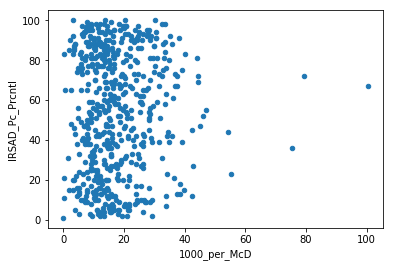

In [503]:
McD_AU[['1000_per_McD', 'IRSAD_Pc_Prcntl']].plot(kind = 'scatter', x = '1000_per_McD', y = 'IRSAD_Pc_Prcntl');

## Creating a new dataframe that represents the number of Mcdonalds outlets in an LGA, and the corresponding IRSAD score of that LGA.


In [504]:
McD_in_LGA = McD_AU.groupby('LGA').McD_Count.sum()
McD_in_LGA

LGA
ACT                    6
Albury                 2
Ballarat               1
Bankstown              2
Bass Coast             2
Baw Baw                1
Bega Valley            2
Benalla                2
Berrigan               1
Blacktown              3
Brimbank               1
Brisbane              38
Burnie                 1
Cairns                 1
Canada Bay             3
Canterbury             4
Cardinia               2
Casey                  3
Central Highlands      1
Cessnock               2
Charles Sturt          1
Clarence               1
Coffs Harbour          3
Colac-Otway            1
Darebin                2
Darwin                 3
East Gippsland         1
East Pilbara           1
Fairfield              1
Gladstone              2
                      ..
Warrnambool            2
Warrumbungle Shire     1
Weddin                 1
Wellington            11
Wentworth              3
West Coast             2
West Torrens           5
Western Downs          2
Whitehorse           

In [505]:
LGA_IRSAD = McD_AU.groupby('LGA').IRSAD_Pc_Prcntl.mean()
LGA_IRSAD

LGA
ACT                   92.000000
Albury                27.000000
Ballarat               6.000000
Bankstown             43.500000
Bass Coast            21.000000
Baw Baw               47.000000
Bega Valley           43.000000
Benalla               16.000000
Berrigan              17.000000
Blacktown             63.666667
Brimbank              65.000000
Brisbane              79.653846
Burnie                 8.000000
Cairns                29.000000
Canada Bay            85.666667
Canterbury            42.666667
Cardinia              42.000000
Casey                 68.000000
Central Highlands     59.000000
Cessnock               5.000000
Charles Sturt         54.000000
Clarence              53.000000
Coffs Harbour         38.000000
Colac-Otway           13.000000
Darebin               57.000000
Darwin                88.000000
East Gippsland        15.000000
East Pilbara          37.000000
Fairfield              2.000000
Gladstone             15.000000
                        ...    
Warr

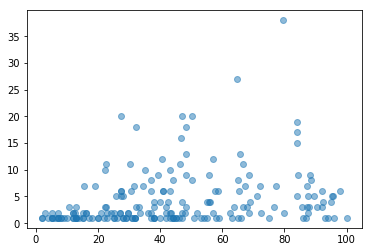

In [506]:
plt.scatter(LGA_IRSAD, McD_in_LGA, alpha=0.5)
plt.show()

**The new dataframe . . .**

In [507]:
LGA_IRSAD_McD = pd.DataFrame(
    {'IRSAD_score': LGA_IRSAD,
     'Number_McD': McD_in_LGA,
    })
LGA_IRSAD_McD.head(10)

,IRSAD_score,Number_McD
LGA,,
ACT,92.000000,6
Albury,27.000000,2
Ballarat,6.000000,1
Bankstown,43.500000,2
Bass Coast,21.000000,2
Baw Baw,47.000000,1
Bega Valley,43.000000,2
Benalla,16.000000,2
Berrigan,17.000000,1


## Visualising the relationship between the above factors.


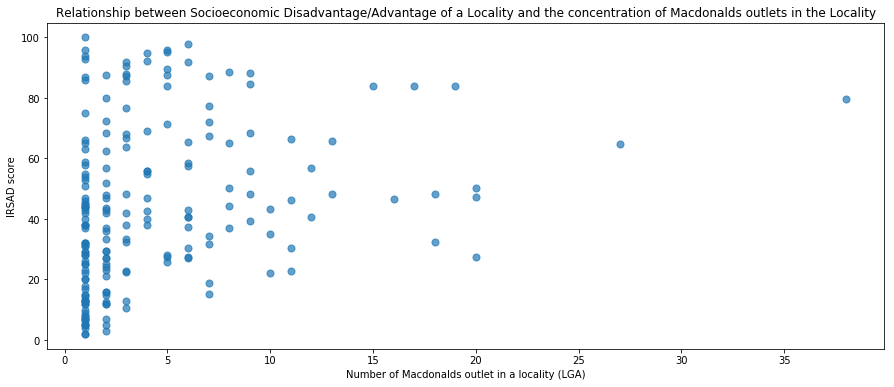

In [508]:
LGA_IRSAD_McD.plot(kind = 'scatter', x = 'Number_McD', y = 'IRSAD_score', 
                   figsize =(15,6), alpha=0.7, s=50,
            title = 'Relationship between Socioeconomic Disadvantage/Advantage of a Locality and the concentration of Macdonalds outlets in the Locality');
plt.xlabel('Number of Macdonalds outlet in a locality (LGA)')
plt.ylabel('IRSAD score');
# plt.savefig('IRSAD_scores_by_MaccasOutlet.png'); 

**The same data transformed, . . .**


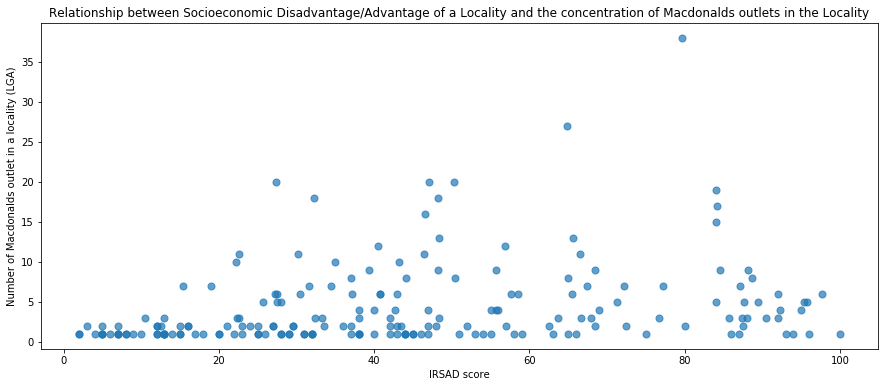

In [509]:
LGA_IRSAD_McD.plot(kind = 'scatter', y = 'Number_McD', x = 'IRSAD_score', 
                   figsize =(15,6), alpha=0.7, s=50,
            title = 'Relationship between Socioeconomic Disadvantage/Advantage of a Locality and the concentration of Macdonalds outlets in the Locality');
plt.ylabel('Number of Macdonalds outlet in a locality (LGA)')
plt.xlabel('IRSAD score');

## Measuring the degree of relationship of the those same factors.


In [510]:
LGA_IRSAD_McD.corr().style.background_gradient()

,IRSAD_score,Number_McD
IRSAD_score,1,0.265545
Number_McD,0.265545,1


## Exploring possible other correlations in the factors presenting in the main dataframe.


Moreover, the strongest meaningful correlation, which at 0.53 was still a weak one, showed to be the relationship between the population of the locality and the number of outlets in that locality - which is arguably a factor of simple business imperative (of being situated in high population locations) more than anything else.

In [511]:
# titanic.corr().style.background_gradient()
McD_AU.corr().style.background_gradient()

,McD_Pc,McD_Count,IRSAD_Pc_Decile,IRSAD_Pc_Prcntl,Pop_Pc,Peo_per_McD,1000_per_McD
McD_Pc,1,-0.094901,-0.141088,-0.149023,-0.0521385,-0.0123412,-0.0123451
McD_Count,-0.094901,1,-0.02421,-0.0270228,0.529613,-0.233587,-0.233507
IRSAD_Pc_Decile,-0.141088,-0.02421,1,0.995442,0.00453925,0.0542144,0.0541766
IRSAD_Pc_Prcntl,-0.149023,-0.0270228,0.995442,1,-0.000328793,0.0494672,0.0494293
Pop_Pc,-0.0521385,0.529613,0.00453925,-0.000328793,1,0.613789,0.613813
Peo_per_McD,-0.0123412,-0.233587,0.0542144,0.0494672,0.613789,1,0.999996
1000_per_McD,-0.0123451,-0.233507,0.0541766,0.0494293,0.613813,0.999996,1
